First run foxsi2_emandt_limit.pro to generate data

In [1]:
#import seaborn as sns
from scipy.io import readsav
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

In [2]:
#count_limit = [3.300, 5.683, 8.900] # one count
count_limit = [1.841, 3.783, 6.608] # zero counts
strs = [ '1$\sigma$', '2$\sigma$', '3$\sigma$']
fmt = {}

In [3]:
data = readsav('/Users/kamilobu/Desktop/foxsi2_thermal_limit_flux.dat')

In [4]:
data.keys()

dict_keys(['flux_array', 'cts_array', 'photon_fluxes', 't', 'log_em', 'thermal_energy'])

In [5]:
t = data['t']
log_em = data['log_em']
flux_array = np.transpose(data['flux_array'])
thermal_energy = np.transpose(data['thermal_energy'])
photon_fluxes = data['photon_fluxes']
cts_array = data['cts_array']

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/matplotlib/contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


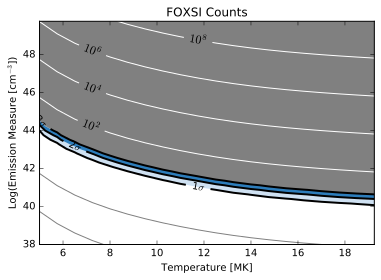

In [6]:
cmap = plt.cm.get_cmap("Blues")
cmap.set_under("white")
cmap.set_over("grey")
cs = plt.contourf(t, log_em,flux_array, count_limit, color='black', linewidths=2, extend='both', cmap=cmap);
cs = plt.contour( t, log_em,flux_array, count_limit, colors='black', linewidths=2);
cs2 = plt.contour( t, log_em,np.log10(flux_array), levels=np.arange(2,100,2), colors='white')
plt.clabel(cs2, inline=1, fontsize=12, colors='black', fmt=r"$10^%i$")


cs2 = plt.contour( t, log_em,np.log10(flux_array), levels=np.arange(-100,0,2), colors='grey', linestyle='-')
fmt = {}
for l,s in zip( cs.levels, strs ):
    fmt[l] = s
plt.clabel(cs, cs.levels, inline=1, fontsize=10, colors='black', fmt=fmt)
plt.ylabel('Log(Emission Measure [cm$^{-3}$])')
plt.xlabel('Temperature [MK]')
plt.title('FOXSI Counts')
plt.savefig('foxsi2_emandt_limit.pdf')

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/matplotlib/contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


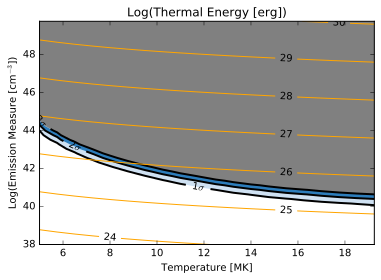

In [7]:
cmap = plt.cm.get_cmap("Blues")
cmap.set_under("white")
cmap.set_over("grey")
cs = plt.contourf(t, log_em, flux_array, count_limit, color='black', linewidths=2, extend='both', cmap=cmap);
cs = plt.contour(t, log_em, flux_array, count_limit, colors='black', linewidths=2);
m = [np.floor(np.min(np.log10(thermal_energy))), np.ceil(np.max(np.log10(thermal_energy)))]
levels = np.arange(m[0], m[1], 1)
cs2 = plt.contour(t, log_em,  np.log10(thermal_energy), levels=levels, colors='orange')
plt.clabel(cs2, inline=1, fontsize=10, colors='black', fmt="%i")
fmt = {}
for l,s in zip( cs.levels, strs ):
    fmt[l] = s
plt.clabel(cs, cs.levels, inline=1, fontsize=10, colors='black', fmt=fmt)
plt.legend()
plt.ylabel('Log(Emission Measure [cm$^{-3}$])')
plt.xlabel('Temperature [MK]')
plt.title('Log(Thermal Energy [erg])')
plt.savefig('foxsi2_energy_limit.pdf')

In [9]:
print(cts_array)

[  3.21177649e-03   8.06761999e-03   2.02649496e-02   5.09032048e-02
   1.27863094e-01   3.21177661e-01   8.06761980e-01   2.02649498e+00
   5.09032345e+00   1.27863102e+01   3.21177673e+01   8.06762009e+01
   2.02649490e+02   5.09032043e+02   1.27863098e+03   3.21177661e+03
   8.06761963e+03   2.02649492e+04   5.09032070e+04   1.27863102e+05]


In [10]:
print(photon_fluxes)

[  1.00000000e-07   2.51188698e-07   6.30957622e-07   1.58489250e-06
   3.98107083e-06   1.00000000e-05   2.51188698e-05   6.30957622e-05
   1.58489337e-04   3.98107083e-04   1.00000000e-03   2.51188698e-03
   6.30957622e-03   1.58489250e-02   3.98107083e-02   1.00000000e-01
   2.51188698e-01   6.30957622e-01   1.58489250e+00   3.98107083e+00]


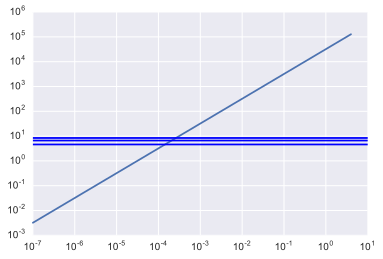

In [19]:
plt.plot(photon_fluxes, cts_array)
plt.xscale('log')
plt.yscale('log')
for c in count_limit:
    plt.axhline(c)

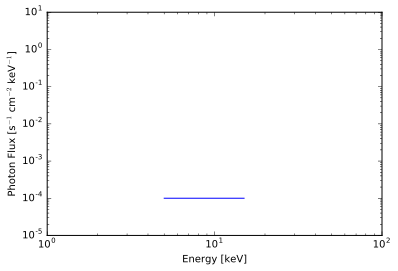

In [12]:
plt.plot([5, 15], [1e-4, 1e-4])
plt.xlim(1, 100)
plt.ylim(1e-5, 1e1)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Photon Flux [s$^{-1}$ cm$^{-2}$ keV$^{-1}$]')
plt.xlabel('Energy [keV]')

# AIA Observations

In [13]:
import glob

In [212]:
from sunpy.map import Map
import astropy.units as u
import matplotlib.patches as patches

In [41]:
data_dir = '/Users/schriste/Data/FOXSI-2-flight/aia/'

In [59]:
str_indices = {'94':'0094', '335':'0335', '193':'0193', '171':'0171', '131':'0131'}
file_list = {}
maps = {}

In [302]:
for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + str_indices[key] + '.fits')})
    maps.update({key: Map(file_list[key], cube=True)})

In [304]:
m = maps['94']

Pair(x=<Quantity 1500.0 pix>, y=<Quantity 1500.0 pix>)


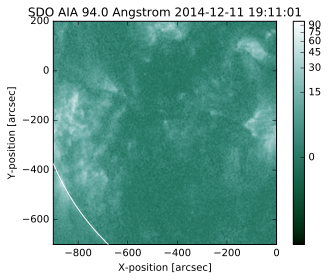

In [245]:
x_range = u.Quantity([-900, 0], 'arcsec')
y_range = u.Quantity([-700, 200], 'arcsec')
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
m.maps[0].submap(x_range, y_range).plot(axes=ax1)
print(m.maps[0].submap(x_range, y_range).dimensions)
asd = m.maps[0].submap(x_range, y_range)
ax1.add_patch(patches.Rectangle(
        (0.1, 0.1),   # (x,y)
        20,          # width
        20,          # height
    )
)
m.maps[0].draw_limb()
plt.colorbar()

In [246]:
asd.dimensions

Pair(x=<Quantity 1500.0 pix>, y=<Quantity 1500.0 pix>)

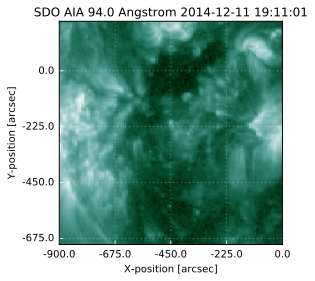

In [282]:
asd.superpixel(u.Quantity([15 * u.pixel, 15 * u.pixel]), method='sum').plot()
plt.savefig('FOXSI-2_small_event.pdf')

In [248]:
type(m.maps)

list

In [249]:
scale = 15
data = np.zeros((1500 / scale, 1500 / scale, len(m.maps)))

In [250]:
for i, s in enumerate(m.maps):
    smap = s.submap(x_range, y_range).superpixel(u.Quantity([15 * u.pixel, 15 * u.pixel]), method='sum')
    data[:,:, i]  = smap.data
    m.maps[i] = smap

In [251]:
m.maps[0].scale

Pair(x=<Quantity 9.00000035763 arcsec / pix>, y=<Quantity 9.00000035763 arcsec / pix>)

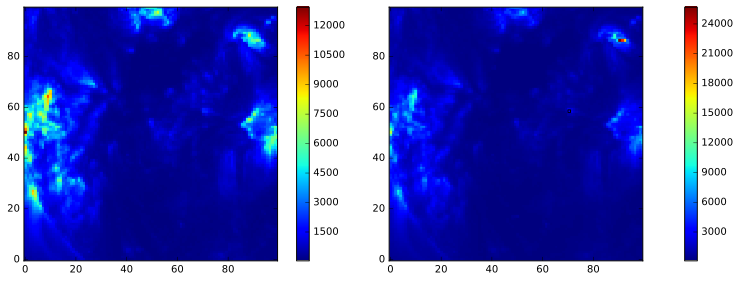

In [277]:
fig1 = plt.figure(figsize=(15,10))
pixel_coord = (70, 58)
ax1 = fig1.add_subplot(211, aspect='equal')
plt.imshow(np.max(data, axis=2), origin='lower')
ax1.add_patch(patches.Rectangle(pixel_coord,1,1,))
plt.colorbar()
ax2 = fig1.add_subplot(221, aspect='equal')
plt.imshow(np.min(data, axis=2), origin='lower')
plt.colorbar()

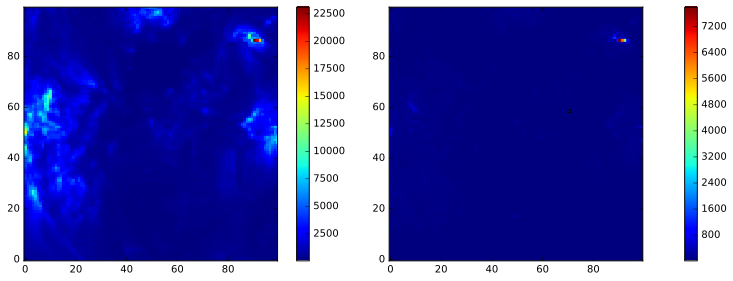

In [280]:
fig1 = plt.figure(figsize=(15,10))
pixel_coord = (70, 58)
ax1 = fig1.add_subplot(211, aspect='equal')
plt.imshow(np.std(data, axis=2), origin='lower')
ax1.add_patch(patches.Rectangle(pixel_coord,1,1,))
plt.colorbar()
ax2 = fig1.add_subplot(221, aspect='equal')
plt.imshow(data[:,:,-1], origin='lower')
plt.colorbar()

In [285]:
m.maps[0].date

datetime.datetime(2014, 12, 11, 19, 11, 1, 120000)

In [288]:
aia94_times = [aia.date for aia in m.maps]

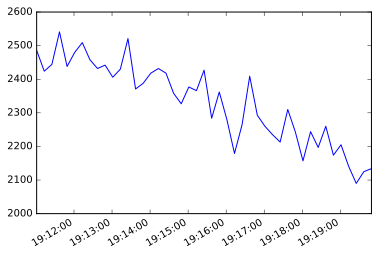

In [293]:
fig = plt.figure()
plt.plot(aia94_times, data[pixel_coord[1],pixel_coord[0],:])
fig.autofmt_xdate()
plt.savefig('aia94_event.pdf')

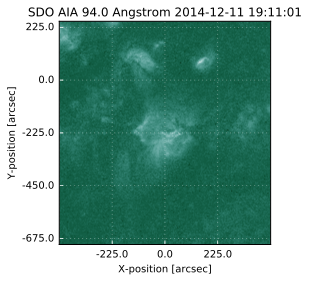

In [107]:
m.plot()


In [299]:
for i, s in enumerate(m):
    print(s.meta)

AttributeError: 'numpy.float32' object has no attribute 'meta'

In [307]:
for s in m.maps:
    print(s.meta)

MapMeta([('dsun_obs', 147274099595.0), ('t_obs', '2014-12-11T19:11:02.57Z'), ('simple', True), ('datavals', 16777216), ('aimgshen', 12), ('aimshctc', 2941.791992), ('aiftsid', 40961), ('datap10', 0.0), ('roi_llx1', -2147483648), ('datap95', 10.0), ('roi_llx2', -2147483648), ('datap90', 7.0), ('aivnmst', 453), ('datap98', 15.0), ('datap99', 20.0), ('aicfgdl4', 236), ('crlt_obs', -0.45515), ('aicfgdl1', 0), ('aicfgdl2', 23), ('aicfgdl3', 87), ('totvals', 16777216), ('acs_mode', 'SCIENCE'), ('crota2', 0.0), ('aimshobe', 67.379997), ('aimshobc', 53.924), ('trecroun', 1), ('aihis860', 8388608), ('r_sun', 1624.64450378), ('orb_rec', 'sdo.fds_orbit_vectors[2014.12.11_19:11:00_UTC]'), ('fid', 0), ('wave_str', '94_THIN'), ('datap25', 1.0), ('aecdelay', 1535), ('int_time', 3.164062), ('trecepoc', '1977.01.01_00:00:00_TAI'), ('tempsmir', 40.144), ('aimshcbc', 2955.736084), ('sat_z0', 14.582132), ('lvl_num', 1.5), ('acs_safe', 'NO'), ('aimshcbe', 2969.483887), ('aifoenfl', 1), ('aifdbid', 241), ('

In [310]:
m[0].meta['dsun_obs']

147274099595.0

In [311]:
for s in m:
    print(s.meta['dsun_obs'])

1.47274099595e+11
1.47274098286e+11
1.47274096998e+11
1.4727409573e+11
1.47274094482e+11
1.47274093252e+11
1.47274092048e+11
1.47274090862e+11
1.47274089696e+11
1.47274088551e+11
1.47274087426e+11
1.47274086322e+11
1.47274085238e+11
1.47274084175e+11
1.47274083132e+11
1.4727408211e+11
1.47274081108e+11
1.47274080126e+11
1.47274079165e+11
1.47274078225e+11
1.47274077305e+11
1.47274076405e+11
1.47274075526e+11
1.47274074668e+11
1.4727407383e+11
1.47274073012e+11
1.47274072215e+11
1.47274071438e+11
1.47274070682e+11
1.47274069946e+11
1.47274069231e+11
1.47274068536e+11
1.47274067862e+11
1.47274067207e+11
1.47274066574e+11
1.4727406596e+11
1.47274065368e+11
1.47274064795e+11
1.47274064245e+11
1.47274063713e+11
1.47274063202e+11
1.47274062712e+11
1.47274062242e+11
1.47274061793e+11
1.47274061364e+11


In [315]:
np.cos(m.maps[0])

AttributeError: 'AIAMap' object has no attribute 'cos'

In [316]:
meta = m.maps[0].meta.copy()

In [319]:
meta['dsun_obs'] = [s.meta['dsun_obs'] for s in m]

In [320]:
meta['dsun_obs']

[147274099595.0,
 147274098286.0,
 147274096998.0,
 147274095730.0,
 147274094482.0,
 147274093252.0,
 147274092048.0,
 147274090862.0,
 147274089696.0,
 147274088551.0,
 147274087426.0,
 147274086322.0,
 147274085238.0,
 147274084175.0,
 147274083132.0,
 147274082110.0,
 147274081108.0,
 147274080126.0,
 147274079165.0,
 147274078225.0,
 147274077305.0,
 147274076405.0,
 147274075526.0,
 147274074668.0,
 147274073830.0,
 147274073012.0,
 147274072215.0,
 147274071438.0,
 147274070682.0,
 147274069946.0,
 147274069231.0,
 147274068536.0,
 147274067862.0,
 147274067207.0,
 147274066574.0,
 147274065960.0,
 147274065368.0,
 147274064795.0,
 147274064245.0,
 147274063713.0,
 147274063202.0,
 147274062712.0,
 147274062242.0,
 147274061793.0,
 147274061364.0]

In [321]:
[s.meta['CDELT1'] for s in m]

[0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842,
 0.600000023842]

In [327]:
[s.meta['lvl_num'] for s in m]

[1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5]

In [326]:
m[0].meta.keys()

['dsun_obs',
 't_obs',
 'simple',
 'datavals',
 'aimgshen',
 'aimshctc',
 'aiftsid',
 'datap10',
 'roi_llx1',
 'datap95',
 'roi_llx2',
 'datap90',
 'aivnmst',
 'datap98',
 'datap99',
 'aicfgdl4',
 'crlt_obs',
 'aicfgdl1',
 'aicfgdl2',
 'aicfgdl3',
 'totvals',
 'acs_mode',
 'crota2',
 'aimshobe',
 'aimshobc',
 'trecroun',
 'aihis860',
 'r_sun',
 'orb_rec',
 'fid',
 'wave_str',
 'datap25',
 'aecdelay',
 'int_time',
 'trecepoc',
 'tempsmir',
 'aimshcbc',
 'sat_z0',
 'lvl_num',
 'acs_safe',
 'aimshcbe',
 'aifoenfl',
 'aifdbid',
 'aimgots',
 'ctype1',
 'exptime',
 'quallev0',
 'obs_vn',
 'aiasen',
 'aifcps',
 'tempccd',
 'cdelt1',
 'cdelt2',
 'rsun_ref',
 'naxis',
 'date-obs',
 'aistate',
 'obs_vw',
 'datamean',
 'datarms',
 'obs_vr',
 'gaex_obs',
 'rsun_obs',
 'aiawvlen',
 'instrume',
 'camera',
 'blank',
 'oscnrms',
 'dn_gain',
 'oscnmean',
 'ctype2',
 'comment',
 'aihis348',
 'naxis1',
 'naxis2',
 'datakurt',
 'eff_area',
 'aifiltyp',
 'haex_obs',
 'acs_eclp',
 'agt1svy',
 'roi_nwin',
 '

In [ ]:
from sunpy.map import MapCubed
from sunpy.map import Map
import glob
data_dir = '/Users/schriste/Data/FOXSI-2-flight/aia/'
str_indices = {'94':'0094', '335':'0335', '193':'0193', '171':'0171', '131':'0131'}
file_list = {}
maps = {}

for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + str_indices[key] + '.fits')})

these_files = file_list['94'][0:10]
print(these_files)

maps = []

for f in these_files:
    maps.append(Map(f))

cubed = MapCubed(maps)
print(cubed)